In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('stars.csv')

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


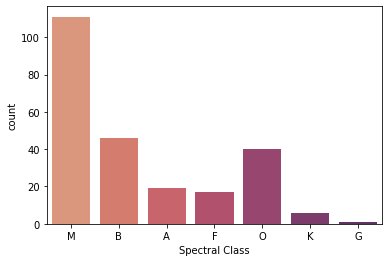

In [4]:
sns.countplot(x='Spectral Class',data=df,palette='flare')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
df.shape  

(240, 7)

In [8]:
#Remove unwanted
#df.drop(['Neo Reference ID','Name','Close Approach Date','Equinox','Orbiting Body','Orbit Determination Date'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
print('Number of features : ',df.shape[1])
print('Number of rows : ',df.shape[0])

Number of features :  7
Number of rows :  240


In [12]:
X = df.drop('Spectral Class',axis=1)
y = df['Spectral Class']

In [13]:
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,8829,537493.000000,1423.0000,-10.73,5,White
238,9235,404940.000000,1112.0000,-11.23,5,White


In [14]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
X = X.values.reshape((X.shape[0], -1))
X = onehot_encoder.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
X_train, X_eval,y_train, y_eval = train_test_split(X,y,random_state = 10,test_size=0.30)

In [16]:
print(X_train.shape, y_train.shape, X_eval.shape, y_eval.shape)

(168, 905) (168,) (72, 905) (72,)


In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
prediction = lr.predict(X_eval)
print("classification_report",classification_report(prediction,y_eval))
print("accuracy_score : {} %".format(accuracy_score(prediction,y_eval)))

classification_report               precision    recall  f1-score   support

           A       0.14      1.00      0.25         1
           B       0.87      0.65      0.74        20
           F       1.00      1.00      1.00         2
           K       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        39
           O       1.00      0.80      0.89        10

    accuracy                           0.88        72
   macro avg       0.67      0.74      0.65        72
weighted avg       0.95      0.88      0.90        72

accuracy_score : 0.875 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
!pip install Lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_eval, y_train, y_eval)
models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [00:04<00:00,  6.29it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.88,0.82,None,0.85,2.40
DecisionTreeClassifier,0.88,0.82,None,0.86,0.02
GaussianNB,0.74,0.82,None,0.72,0.03
PassiveAggressiveClassifier,0.82,0.78,None,0.79,0.12
LinearSVC,0.81,0.78,None,0.78,0.10
Perceptron,0.79,0.76,None,0.76,0.05
RandomForestClassifier,0.88,0.67,None,0.85,0.23
ExtraTreesClassifier,0.88,0.67,None,0.85,0.16
RidgeClassifier,0.79,0.60,None,0.75,0.04


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [21]:
etc = ExtraTreesClassifier(n_estimators=200)
etc.fit(X_train,y_train)
prediction = etc.predict(X_eval)
print("classification_report",classification_report(prediction,y_eval))
print("accuracy_score : {} %".format(accuracy_score(prediction,y_eval)))

classification_report               precision    recall  f1-score   support

           A       0.14      1.00      0.25         1
           B       0.87      0.65      0.74        20
           F       1.00      1.00      1.00         2
           K       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        39
           O       1.00      0.80      0.89        10

    accuracy                           0.88        72
   macro avg       0.67      0.74      0.65        72
weighted avg       0.95      0.88      0.90        72

accuracy_score : 0.875 %


In [24]:
# Ensemble learning approach
# Using ETC as base model for XGBClassifier

model = XGBClassifier(base_estimator=etc,n_estimators=100)
model.fit(X_train,y_train)
prediction = model.predict(X_eval)
print("classification_report",classification_report(prediction,y_eval))
print("accuracy_score : {} %".format(accuracy_score(prediction,y_eval)))

classification_report               precision    recall  f1-score   support

           A       0.14      1.00      0.25         1
           B       0.80      0.75      0.77        16
           F       1.00      0.50      0.67         4
           K       1.00      0.50      0.67         2
           M       1.00      1.00      1.00        39
           O       1.00      0.80      0.89        10

    accuracy                           0.88        72
   macro avg       0.82      0.76      0.71        72
weighted avg       0.94      0.88      0.90        72

accuracy_score : 0.875 %


# Conclusion : 
## Accuracy is same, but precision and recall is much better in ExtraTreesClassifier!

In [25]:
import pickle
# save the model to disk
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
'''
# load the model using these commands
model = pickle.load(open('model.sav', 'rb'))
pred = model.score(X_test, Y_test)
'''

"\n# load the model using these commands\nmodel = pickle.load(open('model.sav', 'rb'))\npred = model.score(X_test, Y_test)\n"